# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

## Question #1

For this question use the data [at this link](https://data.ibb.gov.tr/dataset/hourly-public-transport-data-set).

1. Calculate total hourly uses of different modes of transports (RAY, KARAYOLU, DENİZ) as pandas data frames for January 2021 and May 2021. Do you see any differences in usage patterns? Explain.
2. Calculate total hourly uses of different transfer types (AKTARMA, NORMAL) as pandas data frames for June 2020 and in September 2020.
3. Plot the results for step #1 and #2.
4. Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020
5. Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?


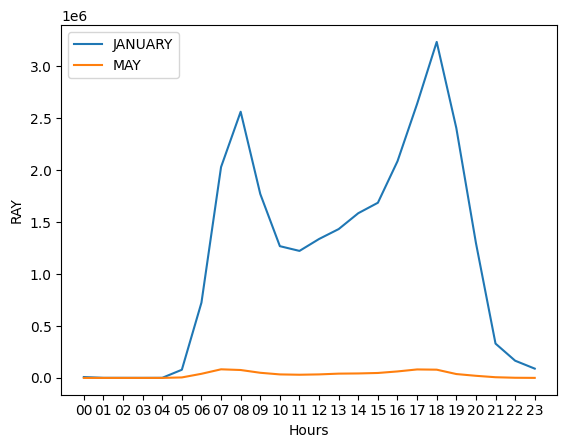

The number of passengers in May 2021 is quite low compared to January because there was a curfew in May.


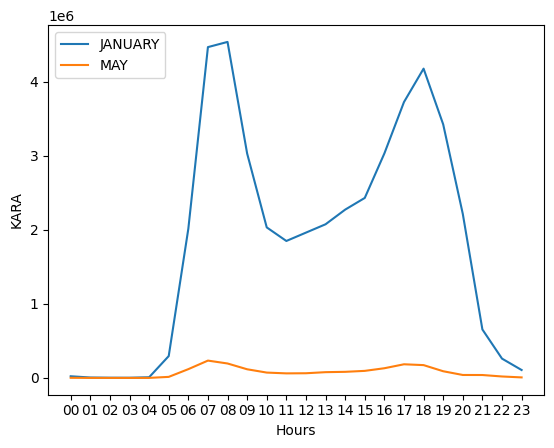

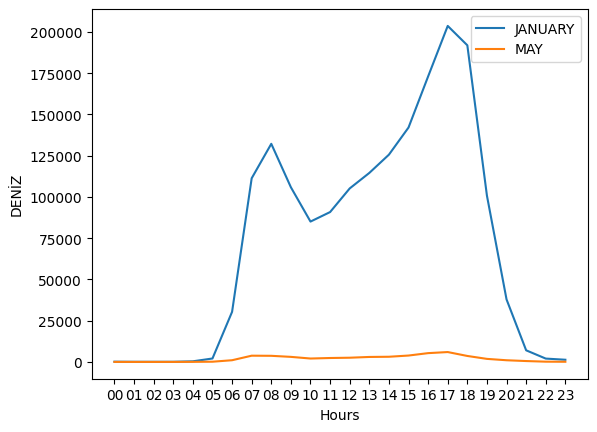

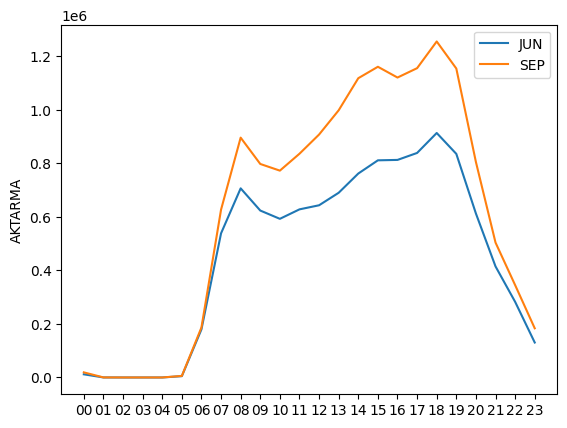

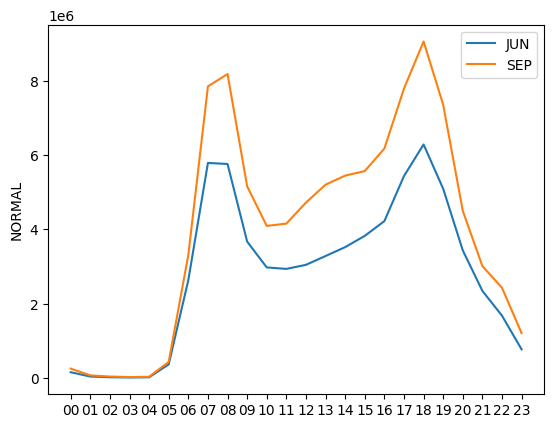

C:\Users\bora5\AppData\Local\Temp\ipykernel_11092\4036655029.py:233: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nisan1=nisan1.groupby(["LINE",'DATE_TIME']).sum()
C:\Users\bora5\AppData\Local\Temp\ipykernel_11092\4036655029.py:233: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nisan1=nisan1.groupby(["LINE",'DATE_TIME']).sum()
C:\Users\bora5\AppData\Local\Temp\ipykernel_11092\4036655029.py:233: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid

10    Busiest line at 2020-04-01:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-02:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-03:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-04:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-05:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-06:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-07:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-08:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-09:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-10:ÖHO
Name: index, dtype: object
12    Busiest line at 2020-04-11:İETT
Name: index, dtype: object
12    Busiest line at 2020-04-12:İETT
Name: index, dtype: object
10    Busiest line at 2020-04-13:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-14:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-15:ÖHO
Name: index, dtype: object
10    Busiest line at 2020-04-16:ÖHO
N

C:\Users\bora5\AppData\Local\Temp\ipykernel_11092\4036655029.py:270: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  august3=august3.groupby(["LINE",'DATE_TIME']).sum()
C:\Users\bora5\AppData\Local\Temp\ipykernel_11092\4036655029.py:270: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  august3=august3.groupby(["LINE",'DATE_TIME']).sum()
C:\Users\bora5\AppData\Local\Temp\ipykernel_11092\4036655029.py:270: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be v

the daily ratios of passage numbers by passenger numbers converges to 1.06


In [1]:
from xmltodict import parse
from urllib.request import urlopen

import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

import pandas as pd
import json
import yaml

import numpy as np
import datetime



january_data=pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/004994f5-3a50-4721-8787-41d4940bdaee/download/hourly_transportation_202101.csv")
ray=january_data[january_data["TRANSPORT_TYPE_DESC"]=="RAY"]
kara=january_data[january_data["TRANSPORT_TYPE_DESC"]=="KARAYOLU"]
deniz=january_data[january_data["TRANSPORT_TYPE_DESC"]=="DENİZ"]

time=["00:00:00","01:00:00","02:00:00","03:00:00","04:00:00","05:00:00","06:00:00","07:00:00","08:00:00","09:00:00","10:00:00","11:00:00","12:00:00","13:00:00","14:00:00","15:00:00","16:00:00",
       "17:00:00","18:00:00","19:00:00","20:00:00","21:00:00","22:00:00","23:00:00"]


def ray_pass(time):
    i=0
    ray_time=ray[ray["DATE_TIME"].str.contains(time)]
    ray_=ray_time["NUMBER_OF_PASSENGER"].sum()
    

    return ray_

def kara_pass(time):
    kara_time=kara[kara["DATE_TIME"].str.contains(time)]
    kara_=kara_time["NUMBER_OF_PASSENGER"].sum()
    return kara_

def deniz_pass(time):
    deniz_time=deniz[deniz["DATE_TIME"].str.contains(time)]
    deniz_=deniz_time["NUMBER_OF_PASSENGER"].sum()
    return deniz_



ray_df=pd.DataFrame(pd.Index([time[0],time[1],time[2],time[3],time[4],time[5],time[6],time[7],time[8],time[9],time[10],time[11],time[12],time[13],time[14],time[15],time[16],
                             time[17],time[18],time[19],time[20],time[21],time[22],time[23]]))

kara_df=pd.DataFrame(pd.Index([time[0],time[1],time[2],time[3],time[4],time[5],time[6],time[7],time[8],time[9],time[10],time[11],time[12],time[13],time[14],time[15],time[16],time[17],time[18],time[19],time[20],time[21],time[22],time[23]]))
deniz_df=pd.DataFrame(pd.Index([time[0],time[1],time[2],time[3],time[4],time[5],time[6],time[7],time[8],time[9],time[10],time[11],time[12],time[13],time[14],time[15],time[16],time[17],time[18],time[19],time[20],time[21],time[22],time[23]]))
i=0
while i<24:

     ray_df.loc[i,"RAY"]=ray_pass(time[i])
     kara_df.loc[i,"KARAYOLU"]=kara_pass(time[i])
     deniz_df.loc[i,"DENİZ"]=deniz_pass(time[i])
     i=i+1


may_data=pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/42b4a830-fee6-4765-9daf-3f3884f09b4b/download/hourly_transportation_202105.csv")


ray=may_data[may_data["TRANSPORT_TYPE_DESC"]=="RAY"]
kara=may_data[may_data["TRANSPORT_TYPE_DESC"]=="KARAYOLU"]
deniz=may_data[may_data["TRANSPORT_TYPE_DESC"]=="DENİZ"]

time=["00:00:00","01:00:00","02:00:00","03:00:00","04:00:00","05:00:00","06:00:00","07:00:00","08:00:00","09:00:00","10:00:00","11:00:00","12:00:00","13:00:00","14:00:00","15:00:00","16:00:00",
       "17:00:00","18:00:00","19:00:00","20:00:00","21:00:00","22:00:00","23:00:00"]


def ray_pass(time):
    i=0
    ray_time=ray[ray["DATE_TIME"].str.contains(time)]
    ray_=ray_time["NUMBER_OF_PASSENGER"].sum()
    

    return ray_

def kara_pass(time):
    kara_time=kara[kara["DATE_TIME"].str.contains(time)]
    kara_=kara_time["NUMBER_OF_PASSENGER"].sum()
    return kara_

def deniz_pass(time):
    deniz_time=deniz[deniz["DATE_TIME"].str.contains(time)]
    deniz_=deniz_time["NUMBER_OF_PASSENGER"].sum()
    return deniz_



ray_df_may=pd.DataFrame(pd.Index([time[0],time[1],time[2],time[3],time[4],time[5],time[6],time[7],time[8],time[9],time[10],time[11],time[12],time[13],time[14],time[15],time[16],
                             time[17],time[18],time[19],time[20],time[21],time[22],time[23]]))

kara_df_may=pd.DataFrame(pd.Index([time[0],time[1],time[2],time[3],time[4],time[5],time[6],time[7],time[8],time[9],time[10],time[11],time[12],time[13],time[14],time[15],time[16],time[17],time[18],time[19],time[20],time[21],time[22],time[23]]))
deniz_df_may=pd.DataFrame(pd.Index([time[0],time[1],time[2],time[3],time[4],time[5],time[6],time[7],time[8],time[9],time[10],time[11],time[12],time[13],time[14],time[15],time[16],time[17],time[18],time[19],time[20],time[21],time[22],time[23]]))
i=0
while i<24:

     ray_df_may.loc[i,"RAY"]=ray_pass(time[i])
     kara_df_may.loc[i,"KARAYOLU"]=kara_pass(time[i])
     deniz_df_may.loc[i,"DENİZ"]=deniz_pass(time[i])
     i=i+1
     

ray_df["RAY(MAY)"]=ray_df_may["RAY"]
kara_df["KARA(MAY)"]=kara_df_may["KARAYOLU"]
deniz_df["DENİZ(MAY)"]=deniz_df_may["DENİZ"]
xpoints=["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
plt.plot(xpoints,ray_df["RAY"],label="JANUARY")
plt.xlabel("Hours")
plt.ylabel("RAY")
plt.plot(xpoints,ray_df["RAY(MAY)"],label="MAY")
plt.legend()
plt.show()
print("The number of passengers in May 2021 is quite low compared to January because there was a curfew in May.")

plt.plot(xpoints,kara_df["KARAYOLU"],label="JANUARY")
plt.xlabel("Hours")
plt.ylabel("KARA")
plt.plot(xpoints,kara_df["KARA(MAY)"],label="MAY")
plt.legend()
plt.show()

plt.plot(xpoints,deniz_df["DENİZ"],label="JANUARY")
plt.xlabel("Hours")
plt.ylabel("DENİZ")
plt.plot(xpoints,(deniz_df["DENİZ(MAY)"]),label="MAY")
plt.legend()
plt.show()







data_june=pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/4f1c434d-bd1f-4937-b88f-6e2df1a85dc5/download/hourly_transportation_202006.csv")









aktarma=data_june[data_june["TRANSFER_TYPE"]=="AKTARMA"]
normal=data_june[data_june["TRANSFER_TYPE"]=="NORMAL"]
def aktarma_pass(time):
    i=0
    aktarma_time=aktarma[aktarma["DATE_TIME"].str.contains(time)]
    aktarma_=aktarma_time["NUMBER_OF_PASSENGER"].sum()
    

    return aktarma_

def normal_pass(time):
    normal_time=normal[normal["DATE_TIME"].str.contains(time)]
    normal_=normal_time["NUMBER_OF_PASSENGER"].sum()
    return normal_

aktarma_df=pd.DataFrame(pd.Index([time[0],time[1],time[2],time[3],time[4],time[5],time[6],time[7],time[8],time[9],time[10],time[11],time[12],time[13],time[14],time[15],time[16],
                             time[17],time[18],time[19],time[20],time[21],time[22],time[23]]))

normal_df=pd.DataFrame(pd.Index([time[0],time[1],time[2],time[3],time[4],time[5],time[6],time[7],time[8],time[9],time[10],time[11],time[12],time[13],time[14],time[15],time[16],time[17],time[18],time[19],time[20],time[21],time[22],time[23]]))
i=0
while i<24:

     aktarma_df.loc[i,"AKTARMA(JUN)"]=aktarma_pass(time[i])
     normal_df.loc[i,"NORMAL(JUN)"]=normal_pass(time[i])
     i=i+1



data_september=pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/5b3b12b7-575d-4b55-b497-62e3b544edb0/download/hourly_transportation_202009.csv")
aktarma=data_september[data_september["TRANSFER_TYPE"]=="AKTARMA"]
normal=data_september[data_september["TRANSFER_TYPE"]=="NORMAL"]
def aktarma_pass(time):
    i=0
    aktarma_time=aktarma[aktarma["DATE_TIME"].str.contains(time)]
    aktarma_=aktarma_time["NUMBER_OF_PASSENGER"].sum()
    

    return aktarma_

def normal_pass(time):
    normal_time=normal[normal["DATE_TIME"].str.contains(time)]
    normal_=normal_time["NUMBER_OF_PASSENGER"].sum()
    return normal_

i=0
while i<24:

     aktarma_df.loc[i,"AKTARMA(SEP)"]=aktarma_pass(time[i])
     normal_df.loc[i,"NORMAL(SEP)"]=normal_pass(time[i])
     i=i+1

plt.plot(xpoints,aktarma_df["AKTARMA(JUN)"],label="JUN")
plt.plot(xpoints,aktarma_df["AKTARMA(SEP)"],label="SEP")
plt.ylabel("AKTARMA")
plt.legend()
plt.show()

plt.plot(xpoints,normal_df["NORMAL(JUN)"],label="JUN")
plt.plot(xpoints,normal_df["NORMAL(SEP)"],label="SEP")
plt.ylabel("NORMAL")
plt.legend()
plt.show()

nisan_data=pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/75e25417-36df-4822-8a18-578f0f7a584a/download/hourly_transportation_202004.csv")



start_date = datetime.date(2020, 4, 1)
number_of_days = 30

date_list = []
for day in range(number_of_days):
  a_date = (start_date + datetime.timedelta(days = day)).isoformat()
  date_list.append(a_date)








def august1(date_list):

    nisan1=nisan_data[nisan_data["DATE_TIME"].str.contains(date_list)]
    nisan1=nisan1.groupby(["LINE",'DATE_TIME']).sum()
    nisan1=nisan1.groupby('LINE')["NUMBER_OF_PASSENGER"].sum()
    nisan1=pd.DataFrame({'index':nisan1.index, date_list:nisan1.values})
    return nisan1






august1=august1(date_list[0]).merge(august1(date_list[1])).merge(august1(date_list[2])).merge(august1(date_list[3])).merge(august1(date_list[4])).merge(august1(date_list[5])).merge(august1(date_list[6])).merge(august1(date_list[7])).merge(august1(date_list[8])).merge(august1(date_list[9])).merge(august1(date_list[10])).merge(august1(date_list[11])).merge(august1(date_list[12])).merge(august1(date_list[13])).merge(august1(date_list[14])).merge(august1(date_list[15])).merge(august1(date_list[16])).merge(august1(date_list[17])).merge(august1(date_list[18])).merge(august1(date_list[19])).merge(august1(date_list[20])).merge(august1(date_list[21])).merge(august1(date_list[22])).merge(august1(date_list[23])).merge(august1(date_list[24])).merge(august1(date_list[25])).merge(august1(date_list[26])).merge(august1(date_list[27])).merge(august1(date_list[28])).merge(august1(date_list[29]))

def index(date_list):

    index1=august1[august1[date_list]==august1[date_list].max()]
    return index1["index"]



for i in range(30):

    print("Busiest line at"+" "+date_list[i]+":"+index(date_list[i])) 

i=0





august1=august1.sum(axis=0)
august1=august1.drop(index=['index'])
august1=pd.DataFrame({'index':august1.index, 'number of passanger':august1.values})


def august3(date_list):

    august3=nisan_data[nisan_data["DATE_TIME"].str.contains(date_list)]
    august3=august3.groupby(["LINE",'DATE_TIME']).sum()
    august3=august3.groupby('LINE')["NUMBER_OF_PASSAGE"].sum()
    august3=pd.DataFrame({'index':august3.index, date_list:august3.values})
    return august3


august3=august3(date_list[0]).merge(august3(date_list[1])).merge(august3(date_list[2])).merge(august3(date_list[3])).merge(august3(date_list[4])).merge(august3(date_list[5])).merge(august3(date_list[6])).merge(august3(date_list[7])).merge(august3(date_list[8])).merge(august3(date_list[9])).merge(august3(date_list[10])).merge(august3(date_list[11])).merge(august3(date_list[12])).merge(august3(date_list[13])).merge(august3(date_list[14])).merge(august3(date_list[15])).merge(august3(date_list[16])).merge(august3(date_list[17])).merge(august3(date_list[18])).merge(august3(date_list[19])).merge(august3(date_list[20])).merge(august3(date_list[21])).merge(august3(date_list[22])).merge(august3(date_list[23])).merge(august3(date_list[24])).merge(august3(date_list[25])).merge(august3(date_list[26])).merge(august3(date_list[27])).merge(august3(date_list[28])).merge(august3(date_list[29]))
august3=august3.sum(axis=0)
august3=august3.drop(index=['index'])
august3=pd.DataFrame({'index':august3.index, 'number of passage':august3.values})


august4=pd.DataFrame({'index':august3.index})
august4['ratio'] = august3['number of passage'].div(august1['number of passanger'])
mean=august4['ratio'].mean()
print("the daily ratios of passage numbers by passenger numbers converges to 1.06")















## Question #2

For this question use the data [at this link](https://alaska.usgs.gov/products/data.php?dataid=522). This dataset contains isotope values of muscle tissue from fish collected in the nearshore Beaufort Sea, Alaska in summers 2017-2019.

1. Calculate the average lengths of fish sampled at each location in the years 2017, 2018 and 2019.
2. Can you statistically observe any differences in lengths between the years 2018 and 2019?
3. Calculate the average concentration of C13 and N15 for the samples collected at each location in the years 2017, 2018 and 2019.
4. Can you statistically observe any differences in C13 and N15 concentrations between the years 2018 and 2019?
5. Can we do the same comparisons for the year 2017 against 2018 or 2019? Why doesn't this work? What should we do to make these comparisons to work?

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip

from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO

with urlopen('https://alaska.usgs.gov/data/aquaticEcology/fish/fish_stableIsotopes_beaufort_stanek/fish_stableIsotopes_beaufort_stanek.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    data = pd.read_csv(zf.open('fish_stableIsotopes_beaufort_stanek.csv'))

data1=data[data['Date'].str.contains('2017',na=False)]

#Means 2017
data1=(data1.groupby(['Location','Date'])['mmLength'].mean()).groupby('Location').mean()
data1=pd.DataFrame({'index':data1.index,'mean':data1.values})

#Means 2018
data2=data[data['Date'].str.contains('2018',na=False)]
data2=(data2.groupby(['Location','Date'])['mmLength'].mean()).groupby('Location').mean()
data2=pd.DataFrame({'index':data2.index,'mean':data2.values})



#Means 2019
data3=data[data['Date'].str.contains('2019',na=False)]
data3=(data3.groupby(['Location','Date'])['mmLength'].mean()).groupby('Location').mean()
data3=pd.DataFrame({'index':data3.index,'mean':data3.values})





s1=data2['mean']
s2=data3['mean']
s1.corr(s2)
print(s1.corr(s2))
print("There is a high and positive correlation between the average lengths. This indicates that the mean values increase or decrease together.")





#Means 2017 c13
data4=data[data['Date'].str.contains('2017',na=False)]
data4=(data4.groupby(['Location','Date'])['d13C'].mean()).groupby('Location').mean()
data4=pd.DataFrame({'index':data4.index,'mean':data4.values})

#Means 2017 n15
data5=data[data['Date'].str.contains('2017',na=False)]
data5=(data5.groupby(['Location','Date'])['d15N'].mean()).groupby('Location').mean()
data5=pd.DataFrame({'index':data5.index,'mean':data5.values})


#Means 2018 c13
data6=data[data['Date'].str.contains('2018',na=False)]
data6=(data6.groupby(['Location','Date'])['d13C'].mean()).groupby('Location').mean()
data6=pd.DataFrame({'index':data6.index,'mean':data6.values})

#Means 2018 n15
data7=data[data['Date'].str.contains('2018',na=False)]
data7=(data7.groupby(['Location','Date'])['d15N'].mean()).groupby('Location').mean()
data7=pd.DataFrame({'index':data7.index,'mean':data7.values})





#Means 2019 c13
data8=data[data['Date'].str.contains('2019',na=False)]
data8=(data8.groupby(['Location','Date'])['d13C'].mean()).groupby('Location').mean()
data8=pd.DataFrame({'index':data8.index,'mean':data8.values})

#Means 2019 n15
data9=data[data['Date'].str.contains('2017',na=False)]
data9=(data9.groupby(['Location','Date'])['d15N'].mean()).groupby('Location').mean()
data9=pd.DataFrame({'index':data9.index,'mean':data9.values})



print(data6.corrwith(data8)) #Correlation between d13C values
print(data7.corrwith(data9)) #Correlation between d15N values
print("There is a perfect correlation between dn15N values ")

print("We cant comparisons between 2017 with 2018 or 2019.Because dimensions are different")






0.865788201897044
There is a high and positive correlation between the average lengths. This indicates that the mean values increase or decrease together.
mean    0.460435
dtype: float64
mean    1.0
dtype: float64
There is a perfect correlation between dn15N values 


C:\Users\bora5\AppData\Local\Temp\ipykernel_12200\3819205090.py:84: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data6.corrwith(data8)) #Correlation between d13C values
C:\Users\bora5\AppData\Local\Temp\ipykernel_12200\3819205090.py:85: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data7.corrwith(data9)) #Correlation between d15N values
